# Redshift Data of DESIJ1018-0121

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS

In [6]:
data, header = fits.getdata("DESIJ1018-0121_F140W_drz_sci.fits", header=True)

In [7]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [8]:
FILENAME = "photo_z_DESIJ1018-0121.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.008676,8000323786000111,154.698387,-1.367459,8000,323786,111,PSF,0.003,P6,0.611,0.163,1,1
1,0.002221,8000323786000169,154.697303,-1.357501,8000,323786,169,DEV,0.184,D8,0.494,0.120,1,1
2,0.001362,8000323786000170,154.697190,-1.359045,8000,323786,170,DEV,0.001,D1,0.400,0.029,1,1
3,0.005325,8000323786000171,154.700827,-1.361020,8000,323786,171,DEV,0.001,D2,0.401,0.027,1,1
4,0.004215,8000323786000172,154.699197,-1.356626,8000,323786,172,REX,0.003,R4,0.414,0.111,1,1


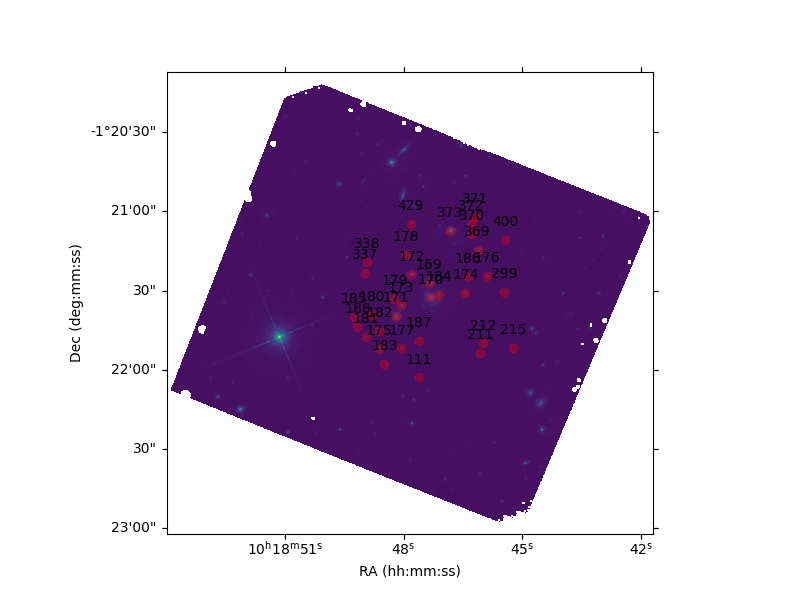

In [9]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [10]:
# In degrees
center_x, center_y = 154.6958333, -1.3591667  # RA 10:18:47 DEC -01:21:33
radii = 20  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

1058.9618552411212 1558.820454593107


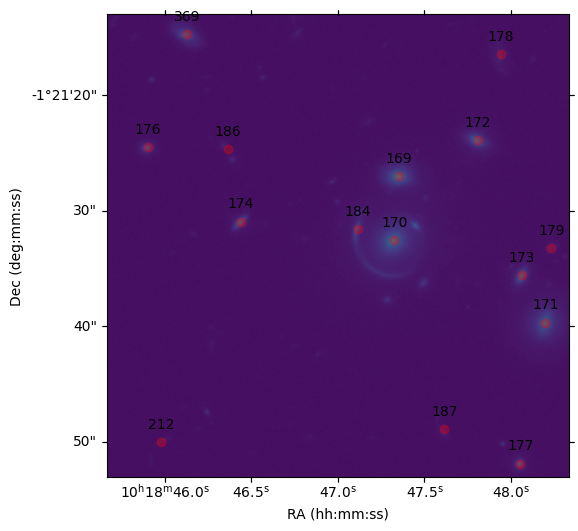

In [12]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [13]:
data_legacy.sort_values(by="objid")

object_ids = [170, # central deflector
              169, 172, 173, 174]  

columns_to_drop = [
    "id",
    "RAJ2000",
    "DEJ2000",
    "release",
    "brickid",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
169    0.002221  DEV  0.184      D8  0.494    0.120       1      1
170    0.001362  DEV  0.001      D1  0.400    0.029       1      1
172    0.004215  REX  0.003      R4  0.414    0.111       1      1
173    0.004484  REX  0.003      R4  0.402    0.098       1      1
174    0.002406  REX  0.010      R4  0.370    0.070       1      1
